In [54]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot

# Acquire Data


In [3]:
# bring in sample trade log from site
trades = pd.read_csv('trades_sample.csv')

In [4]:
# view df and all columns
pd.set_option('display.max_columns', None)
trades 

,Unnamed: 0,account_type,action,activity_code,amount,as_of_date,check_number,commission,commission_in_gross,contra_broker,cusip,description,effective_date,entry_date,exchange_rate,fees,from_location,front_exec,held_currency_code,interest,maturity_date,misc_fee,nfa_fee,order_number,output_currency_code,payee,price,principal,quantity,sales_credit,sec_fee,security_class_code,security_type,state_tax,symbol,tax_exempt_status,taxes,to_location,trade,transaction_date,user_defined_action
0,0,INVENTORY,Sale,NaN,158632.00,NaN,NaN,0,Y,NaN,01639PBJ9,ALISO VIEJO CALIF CTFS PARTN COPS ...,"Thu, 03 Sep 2020 12:00:00 am EDT","Tue, 01 Sep 2020 2:23:10 am EDT",1.0,0,NaN,NaN,USD,1525.00,NaN,0,0,N0001F99,USD,NaN,104.738,-157107.00,-150000,0,0,NaN,FIXED,0,FIXED 01639PBJ9,NaN,0,NaN,Y,"Tue, 01 Sep 2020 12:00:00 am EDT",NaN
1,1,INVENTORY,Purchase,NaN,-84760.04,NaN,NaN,0,N,NaN,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,"Thu, 03 Sep 2020 12:00:00 am EDT","Tue, 01 Sep 2020 4:36:57 am EDT",1.0,0,NaN,VSIN,USD,19.44,NaN,0,0,N0007F99,USD,NaN,121.058,84740.60,70000,0,0,NaN,FIXED,0,FIXED 64580CFQ5,NaN,0,NaN,Y,"Tue, 01 Sep 2020 12:00:00 am EDT",NaN
2,2,INVENTORY,Sale,NaN,85589.47,NaN,NaN,0,N,NaN,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,"Fri, 04 Sep 2020 12:00:00 am EDT","Wed, 02 Sep 2020 9:10:24 am EDT",1.0,0,NaN,NaN,USD,29.17,NaN,0,0,N0201F99,USD,NaN,122.229,-85560.30,-70000,0,0,NaN,FIXED,0,FIXED 64580CFQ5,NaN,0,NaN,Y,"Wed, 02 Sep 2020 12:00:00 am EDT",NaN
3,3,INVENTORY,Sale,NaN,125835.30,NaN,NaN,0,Y,NaN,054231QS7,AVON OHIO LOC SCH DIST GO UNLTD TAX IMPT BDS ...,"Thu, 10 Sep 2020 12:00:00 am EDT","Wed, 02 Sep 2020 1:19:33 am EDT",1.0,0,NaN,NaN,USD,0.00,NaN,0,0,N0401F99,USD,NaN,109.422,-125835.30,-115000,0,0,NaN,FIXED,0,FIXED 054231QS7,NaN,0,NaN,Y,"Wed, 02 Sep 2020 12:00:00 am EDT",NaN
4,4,INVENTORY,Purchase,NaN,-367239.00,NaN,NaN,0,Y,NaN,355525FA9,FRASER VY MET RECREATIONAL DIS REF,"Wed, 16 Sep 2020 12:00:00 am EDT","Wed, 02 Sep 2020 10:21:47 am EDT",1.0,0,NaN,NaN,USD,0.00,NaN,0,0,N0303F99,USD,NaN,122.413,367239.00,300000,0,0,NaN,FIXED,0,FIXED 355525FA9,NaN,0,NaN,Y,"Wed, 02 Sep 2020 12:00:00 am EDT",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,350,INVENTORY,Sale,NaN,68507.60,NaN,NaN,0,Y,NaN,368414AV0,GEAUGA CNTY OHIO SPL OBLIG SAL BDS ...,"Tue, 20 Jul 2021 12:00:00 am EDT","Fri, 16 Jul 2021 4:58:20 am EDT",1.0,0,NaN,NaN,USD,315.00,NaN,0,0,N0001F99,USD,NaN,97.418,-68192.60,-70000,0,0,NaN,FIXED,0,FIXED 368414AV0,NaN,0,NaN,Y,"Fri, 16 Jul 2021 12:00:00 am EDT",NaN
351,351,INVENTORY,Sale,NaN,73839.69,NaN,NaN,0,N,NaN,800851TV9,SANGER CALIF UNI SCH DIST ELECTION OF 2018 GO ...,"Tue, 20 Jul 2021 12:00:00 am EDT","Fri, 16 Jul 2021 9:11:58 am EDT",1.0,0,NaN,VSIN,USD,185.94,NaN,0,0,N0003F99,USD,NaN,98.205,-73653.75,-75000,0,0,NaN,FIXED,0,FIXED 800851TV9,NaN,0,NaN,Y,"Fri, 16 Jul 2021 12:00:00 am EDT",NaN
352,352,INVENTORY,Sale,NaN,73873.44,NaN,NaN,0,N,NaN,800851TV9,SANGER CALIF UNI SCH DIST ELECTION OF 2018 GO ...,"Tue, 20 Jul 2021 12:00:00 am EDT","Fri, 16 Jul 2021 1:06:58 pm EDT",1.0,0,NaN,NaN,USD,185.94,NaN,0,0,N0004F99,USD,NaN,98.250,-73687.50,-75000,0,0,NaN,FIXED,0,FIXED 800851TV9,NaN,0,NaN,Y,"Fri, 16 Jul 2021 12:00:00 am EDT",NaN
353,353,INVENTORY,Sale,NaN,111805.67,NaN,NaN,0,N,NaN,018112SY9,ALLEN TEX WTRWKS & SWR REV SYS BDS ...,"Thu, 29 Jul 2021 12:00:00 am EDT","Tue, 27 Jul 2021 7:40:51 am EDT",1.0,0,NaN,NaN,USD,241.67,NaN,0,0,N0001F99,USD,NaN,111.564,-111564.00,-100000,0,0,NaN,FIXED,0,FIXED 018112SY9,NaN,0,NaN,Y,"Tue, 27 Jul 2021 12:00:00 am EDT",NaN


# Prepare Data

In [5]:
# Drop unnecessary columns
trades = trades.drop(columns=['Unnamed: 0', 'amount', 'account_type', 'activity_code', 'as_of_date', 'check_number', 'commission', 'commission_in_gross', 'contra_broker', 'exchange_rate', 'fees', 'from_location', 'front_exec', 'held_currency_code', 'interest', 'maturity_date', 'misc_fee', 'nfa_fee', 'order_number', 'output_currency_code', 'payee', 'principal', 'sales_credit', 'sec_fee', 'security_class_code', 'security_type', 'state_tax', 'symbol', 'tax_exempt_status', 'taxes', 'to_location', 'trade',  'user_defined_action'])

In [6]:
# Divide trades by 1000 per bond quantity
trades['quantity'] = (trades.quantity)/1000

In [7]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   action            355 non-null    object 
 1   cusip             355 non-null    object 
 2   description       355 non-null    object 
 3   effective_date    355 non-null    object 
 4   entry_date        355 non-null    object 
 5   price             355 non-null    float64
 6   quantity          355 non-null    float64
 7   transaction_date  355 non-null    object 
dtypes: float64(2), object(6)
memory usage: 22.3+ KB


In [8]:
def convert_date(feature):
    '''takes date/time object, drops timestamp, converts to datetime mm/dd/yyy format'''
    # use regex to drop leading 5 characters (e.g. Thu, )
    trades[feature] = trades[feature].str.replace(r'^(.{5})','')
    # use regex to drop timestamp section at end of string
    trades[feature] = trades[feature].str.replace(r'(.{15})\.*$','')
    # convert object to datetime format
    trades[feature] = pd.to_datetime(trades[feature])
    # format to mm/dd/yyyy format
    trades[feature] = trades[feature].apply(lambda x: x.strftime("%m/%d/%Y"))
    return trades[feature]

In [9]:
trades['transaction_date'] = convert_date('transaction_date')
trades['entry_date'] = convert_date('entry_date')
trades['effective_date'] = convert_date('effective_date')

<ipython-input-8-7ba02226cc12>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  trades[feature] = trades[feature].str.replace(r'^(.{5})','')
<ipython-input-8-7ba02226cc12>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  trades[feature] = trades[feature].str.replace(r'(.{15})\.*$','')


In [10]:
trades.head()

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date
0,Sale,01639PBJ9,ALISO VIEJO CALIF CTFS PARTN COPS ...,09/03/2020,09/01/2020,104.738,-150.0,09/01/2020
1,Purchase,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,09/03/2020,09/01/2020,121.058,70.0,09/01/2020
2,Sale,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,09/04/2020,09/02/2020,122.229,-70.0,09/02/2020
3,Sale,054231QS7,AVON OHIO LOC SCH DIST GO UNLTD TAX IMPT BDS ...,09/10/2020,09/02/2020,109.422,-115.0,09/02/2020
4,Purchase,355525FA9,FRASER VY MET RECREATIONAL DIS REF,09/16/2020,09/02/2020,122.413,300.0,09/02/2020


# Explore Data - Discrepencies/Anomalies

In [11]:
trades[trades.transaction_date != trades.entry_date]

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date
27,Purchase Cancellation,429326N23,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,10/16/2020,117.717,-150.0,09/15/2020
28,Purchase Cancellation,429326N23,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,10/16/2020,117.717,-150.0,09/15/2020
29,Purchase,429326N23,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,10/16/2020,117.717,150.0,09/15/2020
30,Purchase,429326N23,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,10/16/2020,117.717,150.0,09/15/2020
34,Purchase Cancellation,4140187X3,HARRIS CNTY TEX FLOOD CTL DIST IMPT REF BDS ...,09/30/2020,09/23/2020,121.355,-65.0,09/18/2020
35,Purchase,4140187X3,HARRIS CNTY TEX FLOOD CTL DIST IMPT REF BDS ...,09/30/2020,09/23/2020,121.355,65.0,09/18/2020
36,Purchase Cancellation,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,10/15/2020,10/20/2020,100.000,-125.0,09/18/2020
37,Purchase,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,10/15/2020,10/20/2020,100.000,125.0,09/18/2020
58,Sale Cancellation,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,10/15/2020,10/14/2020,99.300,125.0,10/05/2020
77,Purchase,198432KU9,COLUMBIA SC GENERAL OBLIGATION 3.00% MATURITY ...,10/19/2020,10/16/2020,102.762,40.0,10/15/2020


In [12]:
trades[trades.transaction_date != trades.entry_date]

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date
27,Purchase Cancellation,429326N23,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,10/16/2020,117.717,-150.0,09/15/2020
28,Purchase Cancellation,429326N23,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,10/16/2020,117.717,-150.0,09/15/2020
29,Purchase,429326N23,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,10/16/2020,117.717,150.0,09/15/2020
30,Purchase,429326N23,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,10/16/2020,117.717,150.0,09/15/2020
34,Purchase Cancellation,4140187X3,HARRIS CNTY TEX FLOOD CTL DIST IMPT REF BDS ...,09/30/2020,09/23/2020,121.355,-65.0,09/18/2020
35,Purchase,4140187X3,HARRIS CNTY TEX FLOOD CTL DIST IMPT REF BDS ...,09/30/2020,09/23/2020,121.355,65.0,09/18/2020
36,Purchase Cancellation,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,10/15/2020,10/20/2020,100.000,-125.0,09/18/2020
37,Purchase,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,10/15/2020,10/20/2020,100.000,125.0,09/18/2020
58,Sale Cancellation,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,10/15/2020,10/14/2020,99.300,125.0,10/05/2020
77,Purchase,198432KU9,COLUMBIA SC GENERAL OBLIGATION 3.00% MATURITY ...,10/19/2020,10/16/2020,102.762,40.0,10/15/2020


In [13]:
# sale cancellations
trades[trades.action == 'Sale Cancellation']

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date
41,Sale Cancellation,727866AH8,PLATTEVILLE-GILCREST FIRE PROT COPS ...,09/25/2020,09/23/2020,116.193,205.0,09/23/2020
54,Sale Cancellation,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,10/15/2020,10/05/2020,99.300,100.0,10/05/2020
58,Sale Cancellation,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,10/15/2020,10/14/2020,99.300,125.0,10/05/2020
173,Sale Cancellation,266669BY5,DURHAM CALIF UNI SCH DIST GO 2018 ELECTION BDS...,01/20/2021,01/14/2021,121.654,250.0,01/14/2021
182,Sale Cancellation,13063DLW6,CALIFORNIA ST VARIOUS PURP GO REF BDS,01/25/2021,01/25/2021,129.352,390.0,01/21/2021
274,Sale Cancellation,725464CT6,PITTSFIELD MASS ST QUALIFIED MUN PURP LN 2021,05/14/2021,05/14/2021,98.190,570.0,05/12/2021
283,Sale Cancellation,60787PCR6,MOFFAT CNTY COLO CTFS PARTN,05/27/2021,05/18/2021,118.341,185.0,05/18/2021
295,Sale Cancellation,916510AZ3,UPPER SAN JUAN COLO HEALTH SVC REF,05/28/2021,05/26/2021,111.250,30.0,05/26/2021
319,Sale Cancellation,244127W77,DEER PARK TEX INDPT SCH DIST UNLTD TAX BLDG BD...,06/29/2021,06/24/2021,110.405,250.0,06/24/2021
348,Sale Cancellation,242469EZ3,DEARBORN HEIGHTS MICH LTD TAX GO CAP IMPT BDS ...,07/15/2021,07/15/2021,110.767,150.0,07/13/2021


In [14]:
# purchase cancellations
trades[trades.action == 'Purchase Cancellation']

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date
19,Purchase Cancellation,429326M57,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,09/15/2020,129.436,-200.0,09/15/2020
20,Purchase Cancellation,429326N23,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,09/15/2020,117.717,-150.0,09/15/2020
21,Purchase Cancellation,429326M57,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,09/15/2020,129.436,-200.0,09/15/2020
27,Purchase Cancellation,429326N23,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,10/16/2020,117.717,-150.0,09/15/2020
28,Purchase Cancellation,429326N23,HIDALGO CNTY TEX CTFS OBLIG 2020,10/14/2020,10/16/2020,117.717,-150.0,09/15/2020
34,Purchase Cancellation,4140187X3,HARRIS CNTY TEX FLOOD CTL DIST IMPT REF BDS ...,09/30/2020,09/23/2020,121.355,-65.0,09/18/2020
36,Purchase Cancellation,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,10/15/2020,10/20/2020,100.000,-125.0,09/18/2020
131,Purchase Cancellation,189184HQ0,CLOVERDALE CALIF UN SCH DIST ELECTION 2018 GO ...,12/07/2020,12/03/2020,115.750,-1000.0,12/03/2020
161,Purchase Cancellation,801577KZ9,SANTA CLARA CNTY CALIF FING AU REF LEASE REV B...,01/08/2021,01/06/2021,113.097,-200.0,01/06/2021
226,Purchase Cancellation,64966QVR8,NEW YORK N Y GO BDS FISCA,03/24/2021,03/09/2021,104.913,-500.0,03/09/2021


## Data Preparation

In [15]:
# convert object dates to datetime 
trades['effective_date'] = pd.to_datetime(trades.effective_date)
trades['transaction_date'] = pd.to_datetime(trades.transaction_date)
trades['entry_date'] = pd.to_datetime(trades.entry_date)

In [16]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   action            355 non-null    object        
 1   cusip             355 non-null    object        
 2   description       355 non-null    object        
 3   effective_date    355 non-null    datetime64[ns]
 4   entry_date        355 non-null    datetime64[ns]
 5   price             355 non-null    float64       
 6   quantity          355 non-null    float64       
 7   transaction_date  355 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(2), object(3)
memory usage: 22.3+ KB


In [17]:
trades.head()

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date
0,Sale,01639PBJ9,ALISO VIEJO CALIF CTFS PARTN COPS ...,2020-09-03,2020-09-01,104.738,-150.0,2020-09-01
1,Purchase,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,2020-09-03,2020-09-01,121.058,70.0,2020-09-01
2,Sale,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,2020-09-04,2020-09-02,122.229,-70.0,2020-09-02
3,Sale,054231QS7,AVON OHIO LOC SCH DIST GO UNLTD TAX IMPT BDS ...,2020-09-10,2020-09-02,109.422,-115.0,2020-09-02
4,Purchase,355525FA9,FRASER VY MET RECREATIONAL DIS REF,2020-09-16,2020-09-02,122.413,300.0,2020-09-02


In [18]:
# trying to sort by cusip and settlement date
trades.groupby(['cusip', 'effective_date']).head()

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date
0,Sale,01639PBJ9,ALISO VIEJO CALIF CTFS PARTN COPS ...,2020-09-03,2020-09-01,104.738,-150.0,2020-09-01
1,Purchase,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,2020-09-03,2020-09-01,121.058,70.0,2020-09-01
2,Sale,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,2020-09-04,2020-09-02,122.229,-70.0,2020-09-02
3,Sale,054231QS7,AVON OHIO LOC SCH DIST GO UNLTD TAX IMPT BDS ...,2020-09-10,2020-09-02,109.422,-115.0,2020-09-02
4,Purchase,355525FA9,FRASER VY MET RECREATIONAL DIS REF,2020-09-16,2020-09-02,122.413,300.0,2020-09-02
...,...,...,...,...,...,...,...,...
350,Sale,368414AV0,GEAUGA CNTY OHIO SPL OBLIG SAL BDS ...,2021-07-20,2021-07-16,97.418,-70.0,2021-07-16
351,Sale,800851TV9,SANGER CALIF UNI SCH DIST ELECTION OF 2018 GO ...,2021-07-20,2021-07-16,98.205,-75.0,2021-07-16
352,Sale,800851TV9,SANGER CALIF UNI SCH DIST ELECTION OF 2018 GO ...,2021-07-20,2021-07-16,98.250,-75.0,2021-07-16
353,Sale,018112SY9,ALLEN TEX WTRWKS & SWR REV SYS BDS ...,2021-07-29,2021-07-27,111.564,-100.0,2021-07-27


In [19]:
# trades by trade date
trades.sort_values(by=['cusip', 'entry_date'])

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date
88,Purchase,014393YU0,ALDINE TEX INDPT SCH DIST UNLTD TAX REF BDS ...,2020-11-19,2020-10-23,112.067,1000.0,2020-10-23
93,Sale,014393YU0,ALDINE TEX INDPT SCH DIST UNLTD TAX REF BDS ...,2020-11-19,2020-10-28,113.272,-1000.0,2020-10-28
158,Purchase,016059HU4,ALHAMBRA CALIF UNI SCH DIST GO BDS ...,2021-01-07,2021-01-05,127.540,100.0,2021-01-05
166,Sale,016059HU4,ALHAMBRA CALIF UNI SCH DIST GO BDS ...,2021-01-13,2021-01-11,127.689,-75.0,2021-01-11
201,Sale,016059HU4,ALHAMBRA CALIF UNI SCH DIST GO BDS ...,2021-02-16,2021-02-11,127.428,-25.0,2021-02-11
...,...,...,...,...,...,...,...,...
322,Sale,956510BT7,WEST VA PKWYS AUTH TPK TOLL RE SR LIEN BDS ...,2021-07-01,2021-06-29,131.645,-100.0,2021-06-29
102,Purchase,968546MF5,WILKINSBURG-PENN PA JT WTR AUT BDS ...,2020-11-06,2020-11-04,120.692,35.0,2020-11-04
107,Sale,968546MF5,WILKINSBURG-PENN PA JT WTR AUT BDS ...,2020-11-10,2020-11-06,122.500,-35.0,2020-11-06
115,Purchase,977810KA7,WOLFFORTH TEX TAX WTRWKS SWR SYS REV C 2021,2021-01-05,2020-11-17,122.096,315.0,2020-11-17


In [20]:
# trades by settlement
trades.sort_values(by=['cusip', 'effective_date'])

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date
88,Purchase,014393YU0,ALDINE TEX INDPT SCH DIST UNLTD TAX REF BDS ...,2020-11-19,2020-10-23,112.067,1000.0,2020-10-23
93,Sale,014393YU0,ALDINE TEX INDPT SCH DIST UNLTD TAX REF BDS ...,2020-11-19,2020-10-28,113.272,-1000.0,2020-10-28
158,Purchase,016059HU4,ALHAMBRA CALIF UNI SCH DIST GO BDS ...,2021-01-07,2021-01-05,127.540,100.0,2021-01-05
166,Sale,016059HU4,ALHAMBRA CALIF UNI SCH DIST GO BDS ...,2021-01-13,2021-01-11,127.689,-75.0,2021-01-11
201,Sale,016059HU4,ALHAMBRA CALIF UNI SCH DIST GO BDS ...,2021-02-16,2021-02-11,127.428,-25.0,2021-02-11
...,...,...,...,...,...,...,...,...
322,Sale,956510BT7,WEST VA PKWYS AUTH TPK TOLL RE SR LIEN BDS ...,2021-07-01,2021-06-29,131.645,-100.0,2021-06-29
102,Purchase,968546MF5,WILKINSBURG-PENN PA JT WTR AUT BDS ...,2020-11-06,2020-11-04,120.692,35.0,2020-11-04
107,Sale,968546MF5,WILKINSBURG-PENN PA JT WTR AUT BDS ...,2020-11-10,2020-11-06,122.500,-35.0,2020-11-06
115,Purchase,977810KA7,WOLFFORTH TEX TAX WTRWKS SWR SYS REV C 2021,2021-01-05,2020-11-17,122.096,315.0,2020-11-17


In [21]:
# adjust price for p&l calc
trades['index'] = trades.price/100

In [22]:
# create df with sales transactions only
x = trades.loc[(trades.action == 'Sale') | (trades.action == 'Sale Cancellation')]

In [23]:
x['cost'] = trades.loc[trades['action']=='Purchase', 'price']

<ipython-input-23-c7b6d3ce82af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cost'] = trades.loc[trades['action']=='Purchase', 'price']


In [24]:
x

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date,index,cost
0,Sale,01639PBJ9,ALISO VIEJO CALIF CTFS PARTN COPS ...,2020-09-03,2020-09-01,104.738,-150.0,2020-09-01,1.04738,NaN
2,Sale,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,2020-09-04,2020-09-02,122.229,-70.0,2020-09-02,1.22229,NaN
3,Sale,054231QS7,AVON OHIO LOC SCH DIST GO UNLTD TAX IMPT BDS ...,2020-09-10,2020-09-02,109.422,-115.0,2020-09-02,1.09422,NaN
6,Sale,306477MG2,FALLBROOK CALIF UN HIGH SCH DI 2016 ELECTION-S...,2020-09-08,2020-09-03,116.678,-25.0,2020-09-03,1.16678,NaN
7,Sale,306477MG2,FALLBROOK CALIF UN HIGH SCH DI 2016 ELECTION-S...,2020-09-08,2020-09-03,116.678,-35.0,2020-09-03,1.16678,NaN
...,...,...,...,...,...,...,...,...,...,...
350,Sale,368414AV0,GEAUGA CNTY OHIO SPL OBLIG SAL BDS ...,2021-07-20,2021-07-16,97.418,-70.0,2021-07-16,0.97418,NaN
351,Sale,800851TV9,SANGER CALIF UNI SCH DIST ELECTION OF 2018 GO ...,2021-07-20,2021-07-16,98.205,-75.0,2021-07-16,0.98205,NaN
352,Sale,800851TV9,SANGER CALIF UNI SCH DIST ELECTION OF 2018 GO ...,2021-07-20,2021-07-16,98.250,-75.0,2021-07-16,0.98250,NaN
353,Sale,018112SY9,ALLEN TEX WTRWKS & SWR REV SYS BDS ...,2021-07-29,2021-07-27,111.564,-100.0,2021-07-27,1.11564,NaN


In [25]:
# attempting to pull cost from purchase prices
trades.loc[trades['action']=='Purchase', 'price']

1      121.058
4      122.413
5      133.098
8      106.219
10     121.390
        ...   
331     96.777
333    108.578
335    111.640
337    111.640
338    109.604
Name: price, Length: 138, dtype: float64

In [26]:
# pulling cost and cusip from Purchases and saving to df
basis = trades.loc[trades['action']=='Purchase'][['cusip', 'price']]
basis

,cusip,price
1,64580CFQ5,121.058
4,355525FA9,122.413
5,041806XX3,133.098
8,914440SL7,106.219
10,799561NC5,121.390
...,...,...
331,274803DR3,96.777
333,516824MH9,108.578
335,018112SY9,111.640
337,018112SY9,111.640


In [27]:
# merging Sale dataframe with basis df to have cost basis in same row for calcs
calc = x.merge(basis, left_on='cusip', right_on='cusip')
calc

,action,cusip,description,effective_date,entry_date,price_x,quantity,transaction_date,index,cost,price_y
0,Sale,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,2020-09-04,2020-09-02,122.229,-70.0,2020-09-02,1.22229,NaN,121.058
1,Sale,355525FA9,FRASER VY MET RECREATIONAL DIS REF,2020-09-16,2020-09-04,123.200,-300.0,2020-09-04,1.23200,NaN,122.413
2,Sale,799561NC5,SAN YSIDRO CALIF SCH DIST ELECTION 2020-SER A-...,2020-09-17,2020-09-11,121.982,-25.0,2020-09-11,1.21982,NaN,121.390
3,Sale,799561NC5,SAN YSIDRO CALIF SCH DIST ELECTION 2020-SER A-...,2020-09-23,2020-09-21,122.187,-50.0,2020-09-21,1.22187,NaN,121.390
4,Sale,799561NC5,SAN YSIDRO CALIF SCH DIST ELECTION 2020-SER A-...,2020-10-01,2020-09-29,121.457,-35.0,2020-09-29,1.21457,NaN,121.390
...,...,...,...,...,...,...,...,...,...,...,...
210,Sale Cancellation,242469EZ3,DEARBORN HEIGHTS MICH LTD TAX GO CAP IMPT BDS ...,2021-07-15,2021-07-15,110.767,150.0,2021-07-13,1.10767,NaN,110.273
211,Sale,242469EZ3,DEARBORN HEIGHTS MICH LTD TAX GO CAP IMPT BDS ...,2021-07-15,2021-07-15,110.767,-150.0,2021-07-13,1.10767,NaN,110.273
212,Sale,018112SY9,ALLEN TEX WTRWKS & SWR REV SYS BDS ...,2021-07-29,2021-07-27,111.564,-100.0,2021-07-27,1.11564,NaN,111.640
213,Sale,018112SY9,ALLEN TEX WTRWKS & SWR REV SYS BDS ...,2021-07-29,2021-07-27,111.564,-100.0,2021-07-27,1.11564,NaN,111.640


In [28]:
# dropping cost column and renamming basis
calc = calc.drop(columns=('cost'))

In [29]:
calc = calc.rename(columns={'price_y':'cost'})

In [30]:
calc = calc.rename(columns={'price_x':'price'})

In [31]:
# now I have workable df
calc

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date,index,cost
0,Sale,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,2020-09-04,2020-09-02,122.229,-70.0,2020-09-02,1.22229,121.058
1,Sale,355525FA9,FRASER VY MET RECREATIONAL DIS REF,2020-09-16,2020-09-04,123.200,-300.0,2020-09-04,1.23200,122.413
2,Sale,799561NC5,SAN YSIDRO CALIF SCH DIST ELECTION 2020-SER A-...,2020-09-17,2020-09-11,121.982,-25.0,2020-09-11,1.21982,121.390
3,Sale,799561NC5,SAN YSIDRO CALIF SCH DIST ELECTION 2020-SER A-...,2020-09-23,2020-09-21,122.187,-50.0,2020-09-21,1.22187,121.390
4,Sale,799561NC5,SAN YSIDRO CALIF SCH DIST ELECTION 2020-SER A-...,2020-10-01,2020-09-29,121.457,-35.0,2020-09-29,1.21457,121.390
...,...,...,...,...,...,...,...,...,...,...
210,Sale Cancellation,242469EZ3,DEARBORN HEIGHTS MICH LTD TAX GO CAP IMPT BDS ...,2021-07-15,2021-07-15,110.767,150.0,2021-07-13,1.10767,110.273
211,Sale,242469EZ3,DEARBORN HEIGHTS MICH LTD TAX GO CAP IMPT BDS ...,2021-07-15,2021-07-15,110.767,-150.0,2021-07-13,1.10767,110.273
212,Sale,018112SY9,ALLEN TEX WTRWKS & SWR REV SYS BDS ...,2021-07-29,2021-07-27,111.564,-100.0,2021-07-27,1.11564,111.640
213,Sale,018112SY9,ALLEN TEX WTRWKS & SWR REV SYS BDS ...,2021-07-29,2021-07-27,111.564,-100.0,2021-07-27,1.11564,111.640


In [32]:
# Define function that will return profit and loss as well as adjust for any sale cancellations
def pl(x, var1, var2, var3, var4, var5):
    if x[var1] == 'Sale Cancellation':
        x[var5] = abs(x[var2])*((x[var3]-x[var4])*10)*-1
    else:
        x[var5]= abs(x[var2])*(x[var3]-x[var4])*10
    return x    

In [33]:
calc = calc.apply(lambda calc: pl(calc, 'action', 'quantity', 'price', 'cost', 'p&l'), axis=1)

In [34]:
calc

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date,index,cost,p&l
0,Sale,64580CFQ5,NEW JERSEY INFRASTRUCTURE BK ENVIRONMENT REF B...,2020-09-04,2020-09-02,122.229,-70.0,2020-09-02,1.22229,121.058,819.70
1,Sale,355525FA9,FRASER VY MET RECREATIONAL DIS REF,2020-09-16,2020-09-04,123.200,-300.0,2020-09-04,1.23200,122.413,2361.00
2,Sale,799561NC5,SAN YSIDRO CALIF SCH DIST ELECTION 2020-SER A-...,2020-09-17,2020-09-11,121.982,-25.0,2020-09-11,1.21982,121.390,148.00
3,Sale,799561NC5,SAN YSIDRO CALIF SCH DIST ELECTION 2020-SER A-...,2020-09-23,2020-09-21,122.187,-50.0,2020-09-21,1.22187,121.390,398.50
4,Sale,799561NC5,SAN YSIDRO CALIF SCH DIST ELECTION 2020-SER A-...,2020-10-01,2020-09-29,121.457,-35.0,2020-09-29,1.21457,121.390,23.45
...,...,...,...,...,...,...,...,...,...,...,...
210,Sale Cancellation,242469EZ3,DEARBORN HEIGHTS MICH LTD TAX GO CAP IMPT BDS ...,2021-07-15,2021-07-15,110.767,150.0,2021-07-13,1.10767,110.273,-741.00
211,Sale,242469EZ3,DEARBORN HEIGHTS MICH LTD TAX GO CAP IMPT BDS ...,2021-07-15,2021-07-15,110.767,-150.0,2021-07-13,1.10767,110.273,741.00
212,Sale,018112SY9,ALLEN TEX WTRWKS & SWR REV SYS BDS ...,2021-07-29,2021-07-27,111.564,-100.0,2021-07-27,1.11564,111.640,-76.00
213,Sale,018112SY9,ALLEN TEX WTRWKS & SWR REV SYS BDS ...,2021-07-29,2021-07-27,111.564,-100.0,2021-07-27,1.11564,111.640,-76.00


In [35]:
calc[calc['action']=='Sale Cancellation']

,action,cusip,description,effective_date,entry_date,price,quantity,transaction_date,index,cost,p&l
20,Sale Cancellation,727866AH8,PLATTEVILLE-GILCREST FIRE PROT COPS ...,2020-09-25,2020-09-23,116.193,205.0,2020-09-23,1.16193,116.542,715.45
27,Sale Cancellation,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,2020-10-15,2020-10-05,99.300,100.0,2020-10-05,0.99300,100.000,700.00
28,Sale Cancellation,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,2020-10-15,2020-10-05,99.300,100.0,2020-10-05,0.99300,100.000,700.00
35,Sale Cancellation,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,2020-10-15,2020-10-14,99.300,125.0,2020-10-05,0.99300,100.000,875.00
36,Sale Cancellation,539770LM7,LOCKHART TEX INDPT SCH DIST TAXABLE UNLTD TAX ...,2020-10-15,2020-10-14,99.300,125.0,2020-10-05,0.99300,100.000,875.00
94,Sale Cancellation,266669BY5,DURHAM CALIF UNI SCH DIST GO 2018 ELECTION BDS...,2021-01-20,2021-01-14,121.654,250.0,2021-01-14,1.21654,121.547,-267.50
101,Sale Cancellation,13063DLW6,CALIFORNIA ST VARIOUS PURP GO REF BDS,2021-01-25,2021-01-25,129.352,390.0,2021-01-21,1.29352,128.777,-2242.50
154,Sale Cancellation,725464CT6,PITTSFIELD MASS ST QUALIFIED MUN PURP LN 2021,2021-05-14,2021-05-14,98.190,570.0,2021-05-12,0.98190,99.000,4617.00
168,Sale Cancellation,60787PCR6,MOFFAT CNTY COLO CTFS PARTN,2021-05-27,2021-05-18,118.341,185.0,2021-05-18,1.18341,121.711,6234.50
176,Sale Cancellation,916510AZ3,UPPER SAN JUAN COLO HEALTH SVC REF,2021-05-28,2021-05-26,111.250,30.0,2021-05-26,1.11250,110.844,-121.80


### P&L by Settlement

In [36]:
# set settlement date to index
calc = calc.set_index('effective_date')

In [45]:
# monthly P&L by Settlement
monthpl = calc.resample('m')['p&l'].agg('sum')
monthpl

effective_date
2020-09-30     4290.70
2020-10-31    16049.75
2020-11-30    32987.25
2020-12-31    34568.20
2021-01-31    13689.80
2021-02-28   -16720.95
2021-03-31    34250.15
2021-04-30     3557.60
2021-05-31     2492.10
2021-06-30     9625.35
2021-07-31    -7370.40
2021-08-31    -1720.00
Freq: M, Name: p&l, dtype: float64

In [38]:
sum(calc.resample('m')['p&l'].agg('sum'))*.5

62849.77499999981

<AxesSubplot:xlabel='effective_date'>

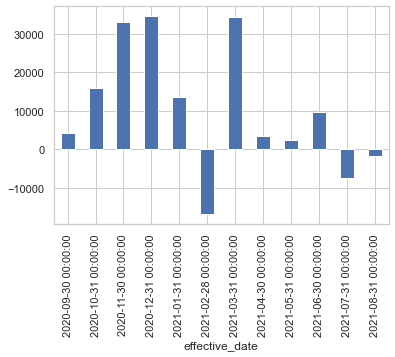

In [60]:
monthpl.plot.bar()

### P&L by Trade Date

In [39]:
### set trade date to index
calc_td = calc.set_index('transaction_date')

In [40]:
# monthly P&L by trade date
calc_td.resample('m')['p&l'].agg('sum')

transaction_date
2020-09-30    12024.15
2020-10-31    27481.30
2020-11-30    41900.70
2020-12-31    12307.10
2021-01-31     9770.95
2021-02-28   -14094.05
2021-03-31    29473.75
2021-04-30     2823.60
2021-05-31     3548.25
2021-06-30    -2220.20
2021-07-31     2684.00
Freq: M, Name: p&l, dtype: float64

In [41]:
sum(calc_td.resample('m')['p&l'].agg('sum'))*.5

62849.77499999982

### Adjustments 

In [42]:
trades[trades.action == 'Sale Cancellation']['cusip']

41     727866AH8
54     539770LM7
58     539770LM7
173    266669BY5
182    13063DLW6
274    725464CT6
283    60787PCR6
295    916510AZ3
319    244127W77
348    242469EZ3
Name: cusip, dtype: object

In [43]:
# Reviewing January 2021 trades by trade date 
calc.loc['2021-07']

,action,cusip,description,entry_date,price,quantity,transaction_date,index,cost,p&l
effective_date,,,,,,,,,,
2021-07-01,Sale,290145BK6,ELOY ARIZ EXCISE TAX & ST SHAR OBLIGS,2021-05-26,110.877,-250.0,2021-05-26,1.10877,110.937,-150.00
2021-07-01,Sale,762196C43,RHODE IS HEALTH & EDL BLDG COR BD FING PROG-EA...,2021-06-29,121.224,-180.0,2021-06-29,1.21224,122.022,-1436.40
2021-07-01,Sale,269731LQ6,EAGLE PASS TEX COMB TAX AND LTD PLG REV 2021,2021-06-23,121.289,-70.0,2021-06-23,1.21289,121.713,-296.80
2021-07-01,Sale,244127W77,DEER PARK TEX INDPT SCH DIST UNLTD TAX BLDG BD...,2021-06-29,109.868,-250.0,2021-06-29,1.09868,111.844,-4940.00
2021-07-20,Sale,516824MB2,LAREDO TEX COMBINATION TAX REV CTFS 2021,2021-06-25,111.526,-20.0,2021-06-25,1.11526,111.062,92.80
2021-07-20,Sale,516824MB2,LAREDO TEX COMBINATION TAX REV CTFS 2021,2021-06-30,110.460,-230.0,2021-06-30,1.10460,111.062,-1384.60
2021-07-01,Sale,956510BT7,WEST VA PKWYS AUTH TPK TOLL RE SR LIEN BDS ...,2021-06-29,131.645,-100.0,2021-06-29,1.31645,133.950,-2305.00
2021-07-13,Sale,79642GMU3,SAN ANTONIO TEX WTR REV SYS JR LIEN REF BDS ...,2021-06-29,121.402,-250.0,2021-06-29,1.21402,121.563,-402.50
2021-07-20,Sale,516824MF3,LAREDO TEX COMBINATION TAX REV CTFS 2021,2021-06-30,109.156,-285.0,2021-06-30,1.09156,109.490,-951.90
